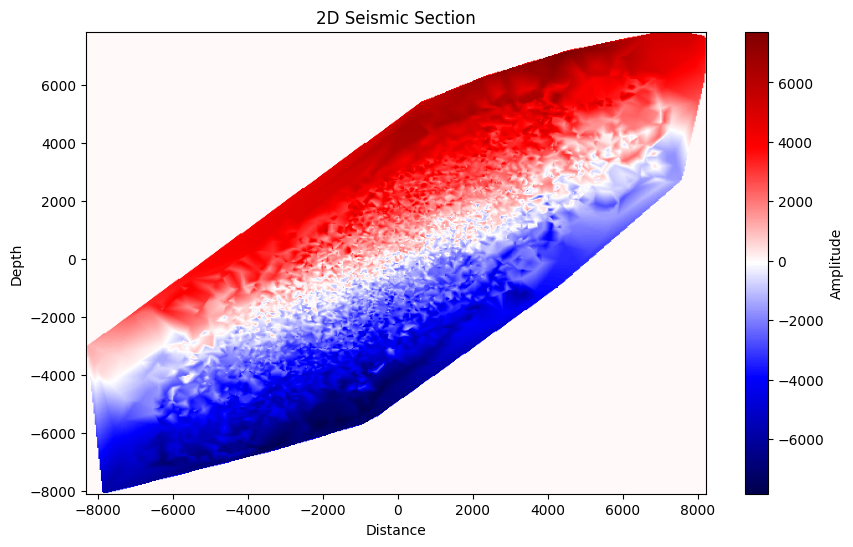

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Dip-steeredMedianFiltered_Seismic/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Define the grid size
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():500j,
                          df['Depth'].min():df['Depth'].max():500j]

# Interpolate the amplitude data
grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='linear')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

plt.figure(figsize=(10, 6))
plt.imshow(grid_z.T, extent=(df['Distance'].min(), df['Distance'].max(), df['Depth'].min(), df['Depth'].max()),
           origin='lower', cmap='seismic', aspect='auto')
plt.colorbar(label='Amplitude')
plt.title('2D Seismic Section')
plt.xlabel('Distance')
plt.ylabel('Depth')
plt.show()



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Dip-steeredMedianFiltered_Seismic/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Define the grid size with higher resolution
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():1000j,
                          df['Depth'].min():df['Depth'].max():1000j]

# Interpolate the amplitude data using cubic interpolation for smoother transitions
grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='cubic')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

# Plot the data
plt.figure(figsize=(12, 8))
plt.imshow(grid_z.T, extent=(df['Distance'].min(), df['Distance'].max(), df['Depth'].min(), df['Depth'].max()),
           origin='lower', cmap='seismic', aspect='auto')
plt.colorbar(label='Amplitude')
plt.title('2D Seismic Section')
plt.xlabel('Distance')
plt.ylabel('Depth')
plt.gca().invert_yaxis()  # Invert the y-axis to have depth increasing downwards
plt.show()


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

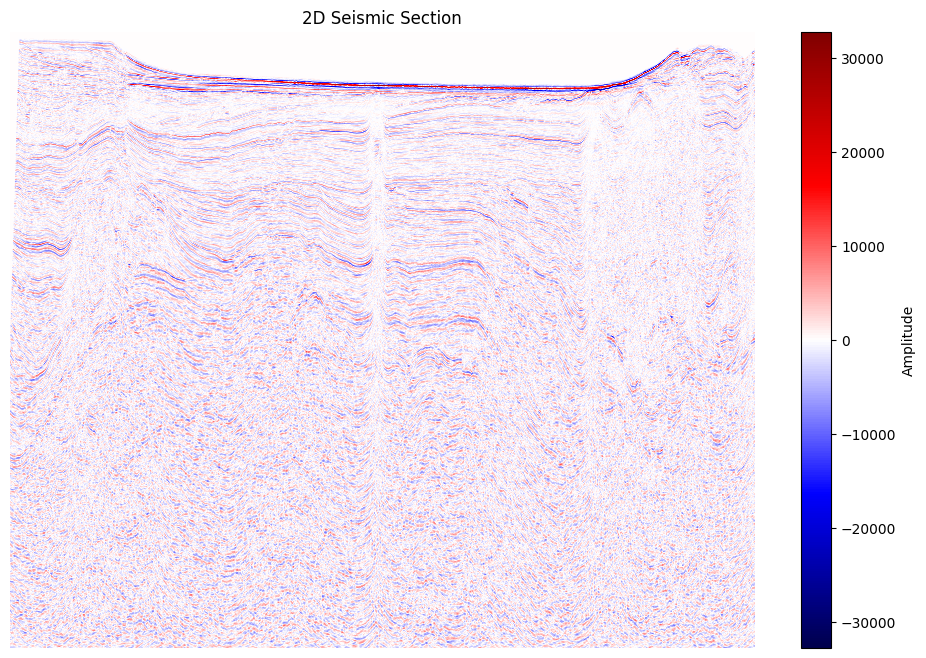

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Seis/output.csv'
data = pd.read_csv(file_path, header=None)

distances = data.iloc[:, 0]
amplitudes = data.iloc[:, 3:].values 
depths = np.arange(amplitudes.shape[1])

amplitudes_rotated = np.rot90(amplitudes)

plt.figure(figsize=(12, 8))
plt.imshow(amplitudes_rotated, aspect='auto', cmap='seismic', extent=[depths.min(), depths.max(), distances.min(), distances.max()], vmin=-np.max(amplitudes), vmax=np.max(amplitudes))
plt.colorbar(label='Amplitude')
plt.title('2D Seismic Section')
plt.xlabel('Depth')
plt.ylabel('Distance')
plt.gca().invert_yaxis()  
plt.axis('off') 
plt.show()

In [ ]:
import lightningchart as lc
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Dip-steeredMedianFiltered_Seismic/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Define the grid size
grid_size = 500
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():complex(grid_size),
                          df['Depth'].min():df['Depth'].max():complex(grid_size)]

# Interpolate the amplitude data
grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='linear')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

# Convert numpy int to Python float
grid_z = grid_z.astype(float)

# Initialize a chart
chart = lc.ChartXY(theme=lc.Themes.Dark, title='2D Seismic Section')

# Create HeatmapGridSeries
heatmap = chart.add_heatmap_grid_series(
    columns=grid_size,
    rows=grid_size,
)

# Set start and end coordinates
heatmap.set_start(x=float(df['Distance'].min()), y=float(df['Depth'].min()))
heatmap.set_end(x=float(df['Distance'].max()), y=float(df['Depth'].max()))

# Set step size
heatmap.set_step(x=float((df['Distance'].max() - df['Distance'].min()) / grid_size), y=float((df['Depth'].max() - df['Depth'].min()) / grid_size))

# Enable intensity interpolation
heatmap.set_intensity_interpolation(True)

# Invalidate intensity values
heatmap.invalidate_intensity_values(grid_z.tolist())

# Hide wireframe
heatmap.hide_wireframe()

# Customize the color palette similar to the seismic colormap
palette_steps = [
    {'value': float(np.min(grid_z)), 'color': lc.Color(0, 0, 128)},  # Dark Blue
    {'value': float(np.min(grid_z) + (np.max(grid_z) - np.min(grid_z)) * 0.25), 'color': lc.Color(0, 0, 255)},  # Blue
    {'value': float(np.min(grid_z) + (np.max(grid_z) - np.min(grid_z)) * 0.5), 'color': lc.Color(196, 164, 132)},  # White
    {'value': float(np.min(grid_z) + (np.max(grid_z) - np.min(grid_z)) * 0.75), 'color': lc.Color(255, 0, 0)},  # Red
    {'value': float(np.max(grid_z)), 'color': lc.Color(128, 0, 0)},  # Dark Red
]

heatmap.set_palette_colors(
    steps=palette_steps,
    look_up_property='value',
    interpolate=True
)

# Set axis titles
chart.get_default_x_axis().set_title('Distance')
chart.get_default_y_axis().set_title('Depth')

# Set axis limits based on the actual data ranges
chart.get_default_x_axis().set_interval(float(df['Distance'].min()), float(df['Distance'].max()))
chart.get_default_y_axis().set_interval(float(df['Depth'].min()), float(df['Depth'].max()))

# Display chart
chart.open()


127.0.0.1 - - [03/Jul/2024 20:19:36] "GET / HTTP/1.1" 200 -


In [5]:
import lightningchart as lc
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/Blake_Ridge_Hydrates_3D/Export/Stack final/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Check for and remove duplicate points
df = df.drop_duplicates(subset=['Distance', 'Depth'])

# Add small noise to Depth to avoid precision errors
df['Depth'] += np.random.normal(0, 1e-6, size=df['Depth'].shape)

# Define the grid size
grid_size = 100
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():complex(grid_size),
                          df['Depth'].min():df['Depth'].max():complex(grid_size)]

# Interpolate the amplitude data
try:
    grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='linear')
except Exception as e:
    print(f"Error using 'linear' method: {e}. Switching to 'nearest' method.")
    grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='nearest')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

# Convert numpy int to Python float
grid_z = grid_z.astype(float)

# Initialize a 3D chart
chart = lc.Chart3D(theme=lc.Themes.Dark, title='3D Seismic Section')

# Create SurfaceGridSeries
series = chart.add_surface_grid_series(columns=grid_size, rows=grid_size)

# Set the intensity values for the heatmap
series.invalidate_intensity_values(grid_z.tolist())

# Set the height map to visualize the 3D surface
series.invalidate_height_map(grid_z.tolist())

# Customize the color palette similar to the seismic colormap
series.set_palette_colors(
    steps=[
        {'value': grid_z.min(), 'color': lc.Color(0, 0, 128)},  # Dark Blue
        {'value': grid_z.min() + (grid_z.max() - grid_z.min()) / 4, 'color': lc.Color(0, 0, 255)},  # Blue
        {'value': grid_z.mean(), 'color': lc.Color(255, 255, 255)},  # White
        {'value': grid_z.max() - (grid_z.max() - grid_z.min()) / 4, 'color': lc.Color(255, 0, 0)},  # Red
        {'value': grid_z.max(), 'color': lc.Color(128, 0, 0)},  # Dark Red
    ],
    look_up_property='value',
    interpolate=True
)

# Display the chart
chart.open()


Error using 'linear' method: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qt Qc Qbb Qz Q12
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 2003387701  delaunay  Qtriangulate  Qcoplanar-keep  Qbbound-last
  Qz-infinity-point  Q12-allow-wide  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 1e+30  Error-roundoff 1.4e+15  _one-merge 9.7e+15
  Visible-distance 2.8e+15  U-max-coplanar 2.8e+15  Width-outside 5.5e+15
  _wide-facet 1.7e+16  _maxoutside 1.1e+16

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p113714(v4):    56    42 2.2e-27
- p115900(v3):    12    42 8.5e-28
- p118114(v2): 1e+30 1e+30 9.1e+29
- p117358(v1):   -54   -57 2.8e-27

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing dis

127.0.0.1 - - [04/Jul/2024 09:17:11] "GET / HTTP/1.1" 200 -


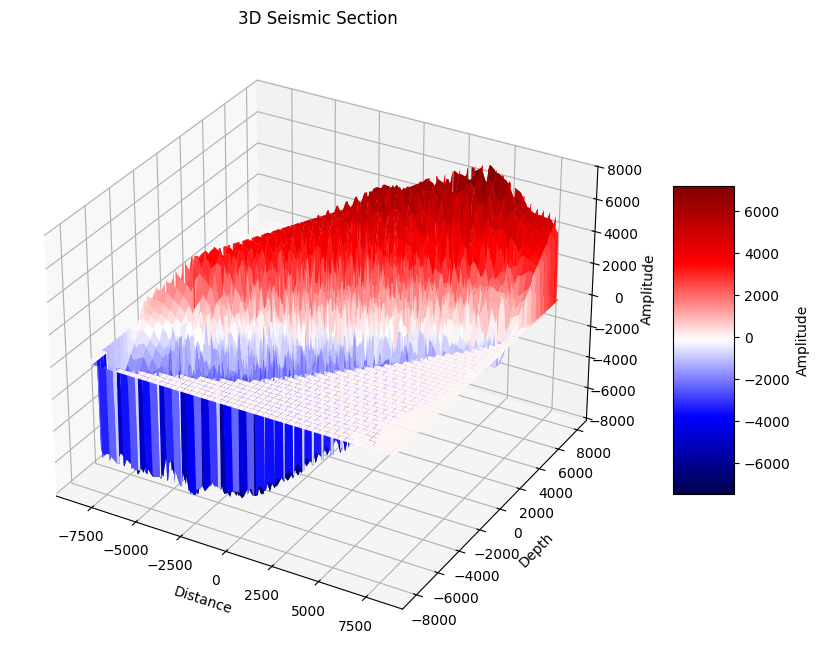

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Dip-steeredMedianFiltered_Seismic/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Define the grid size
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():500j,
                          df['Depth'].min():df['Depth'].max():500j]

# Interpolate the amplitude data
grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='linear')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='seismic', edgecolor='none')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Amplitude')

# Set the title and labels
ax.set_title('3D Seismic Section')
ax.set_xlabel('Distance')
ax.set_ylabel('Depth')
ax.set_zlabel('Amplitude')

plt.show()


In [7]:
import lightningchart as lc
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Dip-steeredMedianFiltered_Seismic/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Convert columns to standard Python float type
df['Distance'] = df['Distance'].astype(float)
df['Depth'] = df['Depth'].astype(float)
df['Amplitude'] = df['Amplitude'].astype(float)

# Define the grid size
grid_size = 500
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():complex(grid_size),
                          df['Depth'].min():df['Depth'].max():complex(grid_size)]

# Interpolate the amplitude data
grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='linear')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

# Initialize a chart
chart = lc.Chart3D(theme=lc.Themes.Dark, title='3D Seismic Section')

# Create SurfaceGridSeries
surface = chart.add_surface_grid_series(
    columns=grid_size,
    rows=grid_size,
)

# Set start and end coordinates
surface.set_start(df['Distance'].min(), df['Depth'].min())
surface.set_end(df['Distance'].max(), df['Depth'].max())

# Set step size
surface.set_step((df['Distance'].max() - df['Distance'].min()) / grid_size, (df['Depth'].max() - df['Depth'].min()) / grid_size)

# Set the height data to be the amplitude values
surface.invalidate_height_map(grid_z.tolist())

# Enable intensity interpolation
surface.set_intensity_interpolation(True)

# Invalidate intensity values
surface.invalidate_intensity_values(grid_z.tolist())

# Customize the color palette similar to the seismic colormap
surface.set_palette_colors(
    steps=[
        {'value': grid_z.min(), 'color': lc.Color(0, 0, 128)},  # Dark Blue
        {'value': grid_z.min() / 2, 'color': lc.Color(0, 0, 255)},  # Blue
        {'value': 0.0, 'color': lc.Color(255, 255, 255)},  # White
        {'value': grid_z.max() / 2, 'color': lc.Color(255, 0, 0)},  # Red
        {'value': grid_z.max(), 'color': lc.Color(128, 0, 0)},  # Dark Red
    ],
    look_up_property='value',
    interpolate=True
)

# Set axis titles
chart.get_default_x_axis().set_title('Distance')
chart.get_default_y_axis().set_title('Depth')
chart.get_default_z_axis().set_title('Amplitude')

# Display chart
chart.open()


127.0.0.1 - - [04/Jul/2024 09:39:29] "GET / HTTP/1.1" 200 -
